# Import the required libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import cv2 
import random
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
class_names:list=["buildings","forest","glacier","mountain","sea","street"]

In [3]:
labels:dict={class_name:label for label,class_name in enumerate(class_names)}
print(labels)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [4]:
def load_data(path: str, mode: str = 'BGR2RGB', size: tuple = (150,150)) -> tuple:
    images = []
    labels_ = []
    class_names = []

    # Get all class directories
    class_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

    if len(class_dirs) == 0:
        image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

        for img_name in image_files:
            img_path = os.path.join(path, img_name)
            try:
                # Read the image with OpenCV
                img = cv2.imread(img_path)
                # Convert the image based on the mode parameter
                if mode == 'BGR2RGB':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                elif mode == 'GRAY':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                else:
                    raise ValueError(f"Unsupported mode: {mode}")

                img = cv2.resize(img, size)
                images.append(img)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        
        # Get all image files in the class directory
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        
        for img_name in image_files:
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image with OpenCV
                img = cv2.imread(img_path)
                 # Convert the image based on the mode parameter
                if mode == 'BGR2RGB':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                elif mode == 'GRAY':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                else:
                    raise ValueError(f"Unsupported mode: {mode}")

                # Resize the image to the specified size
                img = cv2.resize(img, size)
                images.append(img)
                labels_.append(labels[class_dir])
                class_names.append(class_dir)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    images = np.array(images)
    labels_ = np.array(labels_)    
    class_names = np.array(class_names)


    return images, labels_,class_names



### Load Train Data

In [5]:
X_train, y_train, train_class_name = load_data('./archive/seg_train/seg_train')

print(X_train.shape)
print(y_train.shape)
print(train_class_name.shape)

(14034, 150, 150, 3)
(14034,)
(14034,)


### Load Test Data

In [6]:
X_test, y_test, test_class_name = load_data('./archive/seg_test/seg_test')

print(X_test.shape)
print(y_test.shape)
print(test_class_name.shape)

(3000, 150, 150, 3)
(3000,)
(3000,)


### Load Prediction Data

In [7]:
X_pred, _ , _ = load_data('./archive/seg_pred/seg_pred')

print(X_pred.shape)

(7301, 150, 150, 3)


### Visualize Data

In [8]:

def display_examples(class_names, images, labels):
    """
        Display 20 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = np.random.randint(images.shape[0])
        plt.imshow(images[index], cmap='viridis')
        plt.xlabel(class_names[labels[index]])
    plt.show()

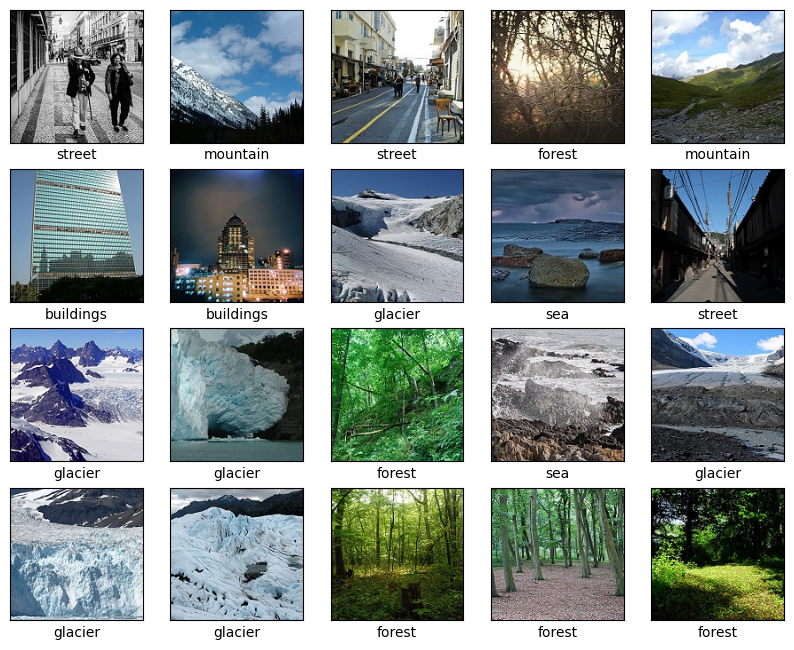

In [9]:
display_examples(class_names, X_train, y_train)

### Visualize Prediction Data

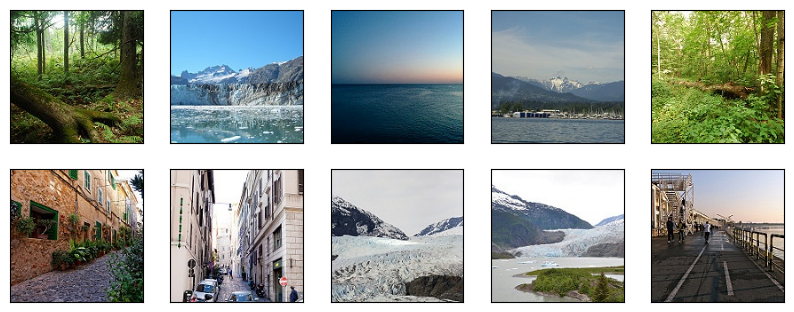

In [10]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = np.random.randint(X_pred.shape[0])
    plt.imshow(X_pred[index], cmap='viridis')
plt.show()

### Normalize Data

In [11]:
print(X_train[0].max())
print(X_train[0].min())

# valores iniciais do X_train
print(X_train[0])

255
0
[[[ 36  55  25]
  [116 140 106]
  [112 140  99]
  ...
  [ 59 100  24]
  [ 31  74   2]
  [ 78 124  52]]

 [[  8  24   0]
  [145 166 135]
  [164 190 151]
  ...
  [ 45  87  11]
  [ 24  72   0]
  [  8  59   0]]

 [[ 14  28   5]
  [ 72  88  62]
  [107 128  97]
  ...
  [ 65 113  37]
  [ 37  91  13]
  [ 49 106  27]]

 ...

 [[  0   7   0]
  [ 27  37  28]
  [  0   3   5]
  ...
  [ 19  34   5]
  [ 22  42   7]
  [ 33  55  16]]

 [[  2  13   0]
  [ 51  61  36]
  [  0   6   0]
  ...
  [ 26  39  11]
  [  6  23   0]
  [ 55  75  38]]

 [[ 19  32   0]
  [ 73  84  50]
  [  2  10   0]
  ...
  [  8  21   0]
  [ 13  28   0]
  [ 10  27   0]]]


In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[0].max())
print(X_train[0].min())
print(X_train[0])

1.0
0.0
[[[0.14117647 0.21568627 0.09803922]
  [0.45490196 0.54901961 0.41568627]
  [0.43921569 0.54901961 0.38823529]
  ...
  [0.23137255 0.39215686 0.09411765]
  [0.12156863 0.29019608 0.00784314]
  [0.30588235 0.48627451 0.20392157]]

 [[0.03137255 0.09411765 0.        ]
  [0.56862745 0.65098039 0.52941176]
  [0.64313725 0.74509804 0.59215686]
  ...
  [0.17647059 0.34117647 0.04313725]
  [0.09411765 0.28235294 0.        ]
  [0.03137255 0.23137255 0.        ]]

 [[0.05490196 0.10980392 0.01960784]
  [0.28235294 0.34509804 0.24313725]
  [0.41960784 0.50196078 0.38039216]
  ...
  [0.25490196 0.44313725 0.14509804]
  [0.14509804 0.35686275 0.05098039]
  [0.19215686 0.41568627 0.10588235]]

 ...

 [[0.         0.02745098 0.        ]
  [0.10588235 0.14509804 0.10980392]
  [0.         0.01176471 0.01960784]
  ...
  [0.0745098  0.13333333 0.01960784]
  [0.08627451 0.16470588 0.02745098]
  [0.12941176 0.21568627 0.0627451 ]]

 [[0.00784314 0.05098039 0.        ]
  [0.2        0.23921569 0.14

### Dataset statistics

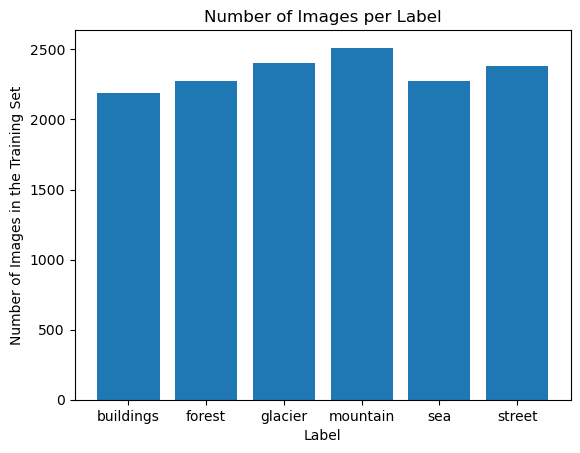

In [13]:
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

# Plot the number of images per label
plt.bar(class_names, train_counts )
plt.xlabel('Label')
plt.ylabel('Number of Images in the Training Set')
plt.title('Number of Images per Label')
plt.show()



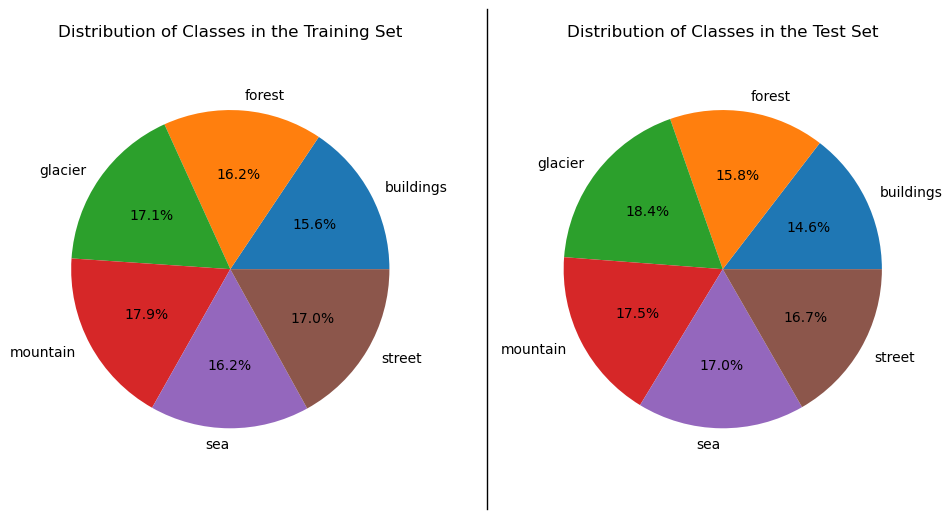

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
fig.subplots_adjust(wspace=50)  # Ajuste o espaço entre os gráficos

axs[0].pie(train_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[0].axis('equal')

axs[1].pie(test_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[1].axis('equal')

axs[0].set_title('Distribution of Classes in the Training Set')
axs[1].set_title('Distribution of Classes in the Test Set')

fig.canvas.draw()  
xline = 0.5 * (axs[0].get_position().x1 + axs[1].get_position().x0)
line = plt.Line2D([xline, xline], [0, 1], transform=fig.transFigure, color='black', linewidth=1)
fig.add_artist(line)

plt.tight_layout()
plt.show()